In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#loading data
labels=pd.read_csv('labels.csv')
values=pd.read_csv('values.csv')

# Basic Check

In [3]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
# Getting all column di values
values.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [6]:
values.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


# Exploratory Data Analysis

In [7]:
# Univariant Analysis values

import sweetviz as sv#importing sweetviz library 
my_application = sv.analyze(values)#syntax to use sweetviz
my_application.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Analysis
* slope_of_peak_exercise_st_segment. Quality of blood to the heart 1 (52%) and 2 (42%)
* thallium stress test measuring blood flow to the heart : Normal 54%, reversible_defect 41%.
* resting blood pressure. 130 (14%), 140 (12%), 120 (11,7%), and others <10%
* chest pain type : category 4 (46%), 3 (32%), 2 (16%), and 1 (7%).

In [8]:
# Merget values and labels to understand dataset
dataset=values.merge(labels,on=['patient_id'],how='left')


In [9]:
dataset.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [10]:
# Univariant Analysis lavel
import sweetviz as sv#importing sweetviz library 
my_application = sv.analyze(dataset)#syntax to use sweetviz
my_application.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='thal', ylabel='count'>

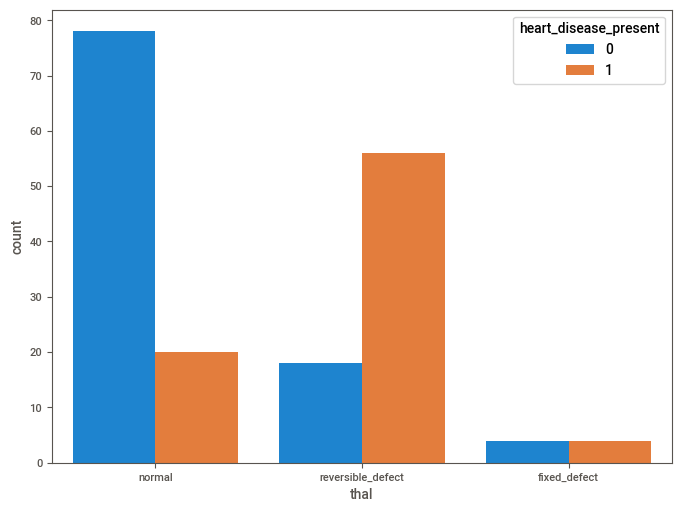

In [11]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='thal', hue='heart_disease_present', data=dataset )

In [12]:
# profile data thall vs heart disease present
dataset.groupby(['thal','heart_disease_present'])['patient_id'].count()

thal               heart_disease_present
fixed_defect       0                         4
                   1                         4
normal             0                        78
                   1                        20
reversible_defect  0                        18
                   1                        56
Name: patient_id, dtype: int64

* measuring blood flow to the heart with category reversible_defect_thal have higher probability to get heartdisease

# Data Processing

In [13]:
# create dataset for mode
data=dataset.drop(['patient_id'],axis=1)

In [14]:
# Review miss value
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

### Convert Categorical data

In [15]:
#identify categorical
data.select_dtypes(include='object').columns


Index(['thal'], dtype='object')

In [16]:
#convert categorical using label encoder
le=LabelEncoder()
le.fit(data.thal)
data['thal']=le.transform(data.thal)

In [17]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


### Feature selection

<AxesSubplot:>

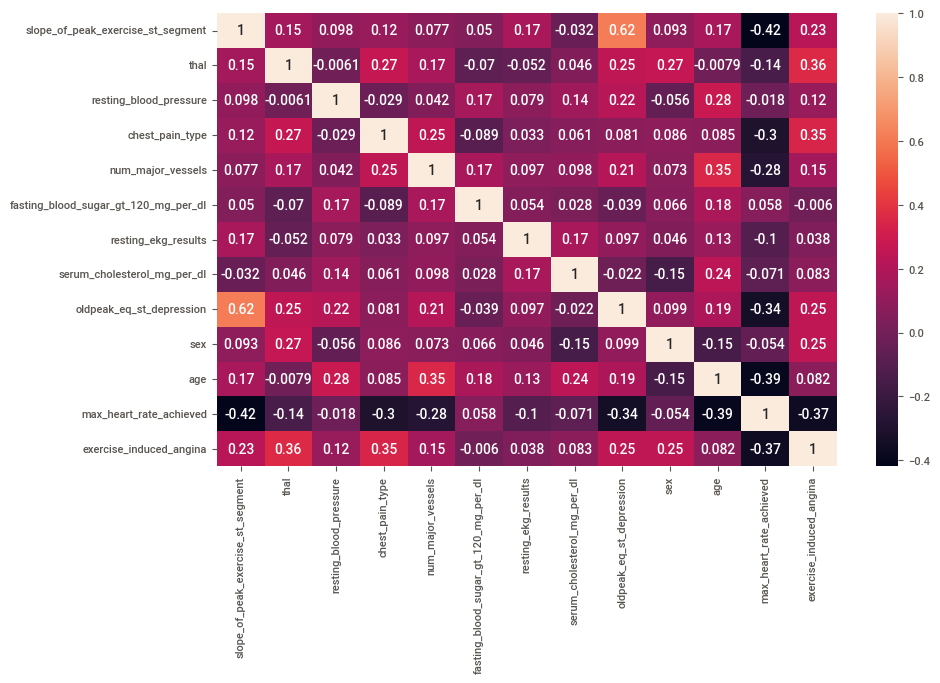

In [18]:
fig, ax = plt.subplots( figsize = (10,6) )
sns.heatmap(data.drop(['heart_disease_present'],axis=1).corr(),annot=True)# checking for correlation
## NO correlated features are present

* oldpeak_eq_st_depression have correlated with slope of peak_exercise_st_segment

## Create Model

In [19]:
## Defining X and y and creating dependent and independent variables
X = data.drop(['heart_disease_present','oldpeak_eq_st_depression'], axis=1) ## independent variable
y = data['heart_disease_present'] ## Dependent or target variable or the variable which we have to predict

## Logistic Regression Model

In [20]:
es## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)# scaling independent variabl

In [21]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 42)
#splitting data into train and test

In [22]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
    
log_reg.fit(x_train,y_train)

LogisticRegression()

In [23]:
# Prediction
y_train_lr=log_reg.predict(x_train)# predicting y_train 
y_test_lr= log_reg.predict(x_test) # predicting y_test

## Evaluation Model Logistic Regression

In [24]:
## calculating accuracy train data
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy_train_lr = accuracy_score(y_train,y_train_lr)# model traning accuracy  
accuracy_train_lr

0.8296296296296296

In [25]:
## calculating accuracy test data
accuracy_test_lr=accuracy_score(y_test,y_test_lr)
accuracy_test_lr

0.8444444444444444

In [26]:
# F1 Score test
F1_Score = f1_score(y_test,y_test_lr)# when precision and recall both are important
F1_Score

0.8444444444444443

In [27]:
# Classification report test data
report_lr=classification_report(y_test, y_test_lr)# it will give precision,recall,f1 scores and accuracy  
print(report_lr)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



In [28]:
#Confusion matrix logistic regression
print(confusion_matrix(y_test,y_test_lr))

[[19  0]
 [ 7 19]]


## Hyperparameters of Logistic Regression

In [29]:
from sklearn.model_selection import GridSearchCV

params_lr = {
    "penalty":('l1', 'l2', 'elasticnet', 'none'),
    "solver": ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 
    "C": (np.logspace(-4,1,4,20))
}

In [30]:
# GridSearch
log_reg_2 =LogisticRegression()
log_reg_cv = GridSearchCV(log_reg_2 , params_lr, scoring="f1", n_jobs=-1, verbose=1, cv=3)

log_reg_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params_lr = log_reg_cv.best_params_#it will give you best parameters 
print(f"Best paramters_log_reg: {best_params_lr})")#printing  best parameters


Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best paramters_log_reg: {'C': 0.21544346900318845, 'penalty': 'l1', 'solver': 'liblinear'})


In [31]:
##Model creation
log_reg_2 = LogisticRegression(C= 0.21544346900318845, penalty='l1', solver='liblinear')
log_reg_2.fit(x_train,y_train)
y_test_lr2= log_reg_2.predict(x_test) # predicting y_test

# F1 Score test
F1_Score_lr2 = f1_score(y_test,y_test_lr2)# when precision and recall both are important
F1_Score_lr2

0.8444444444444443

In [32]:
#Confusion matrix logistic regression
print(confusion_matrix(y_test,y_test_lr2))

[[19  0]
 [ 7 19]]


## Random Forest Model

In [33]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size= 0.25,random_state = 42)


In [34]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,Y_train)#training the data

RandomForestClassifier()

In [35]:
#Prediction
y_train_rf=rf_clf.predict(X_train)#testing
y_test_rf=rf_clf.predict(X_test)#testing

## Evaluation Random Forest

In [36]:
## calculating accuracy train data
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy_train_rf = accuracy_score(y_train,y_train_rf)# model traning accuracy  
accuracy_train_rf

1.0

In [37]:
## calculating accuracy test data
accuracy_test_rf=accuracy_score(y_test,y_test_rf)
accuracy_test_rf

0.8222222222222222

In [38]:
f_Score_rf=f1_score(y_test,y_test_rf)
f_Score_rf

0.8260869565217392

In [39]:
# Classification report test data
report_rf=classification_report(y_test, y_test_rf)# it will give precision,recall,f1 scores and accuracy  
print(report_rf)

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [40]:
print(confusion_matrix(y_test,y_test_rf))

[[18  1]
 [ 7 19]]


## Hyperparameter Tuning Random Forest - Random search

In [41]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, Y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False})


In [42]:
rf_clf2 = RandomForestClassifier(n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', 
                                 max_depth= 20, bootstrap=False)

rf_clf2.fit(X_train, Y_train)#t
y_test_rf2=rf_clf2.predict(X_test)#testing
f1_score_rf2=f1_score(Y_test,y_test_rf2)#checking performance
f1_score_rf2

0.8260869565217392

In [43]:
print(confusion_matrix(y_test,y_test_rf2))

[[18  1]
 [ 7 19]]


##  XGBOOST

In [1]:
!pip install XGBoost

In [44]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size= 0.25,random_state = 42)

In [45]:
## model creation XGBOOSTING
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(X_train,Y_train)# fitting the data
y_train_xgb=xgb.predict(X_train)
y_test_xgb=xgb.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

## Evaluation XGBOOST

In [ ]:
## Accuracy data Train
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix# to check model performance
accuracy_train_xgb=accuracy_score(Y_train,y_train_xgb)
accuracy_train_xgb

In [ ]:
#accuracy test
accuracy_test_xgb=accuracy_score(Y_test,y_test_xgb)
accuracy_test_xgb

In [ ]:
# Classification report test data
report_xgb=classification_report(Y_test, y_test_xgb)# it will give precision,recall,f1 scores and accuracy  
print(report_xgb)

In [ ]:
f_Score_xgb=f1_score(Y_test,y_test_xgb)
f_Score_xgb

In [ ]:
print(confusion_matrix(Y_test,y_test_xgb))

## Hyperparameter Tuning XGboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
XGB_cv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
                        
XGB_cv.fit(X_train, Y_train)##training data on randomsearch cv


In [ ]:
XGB_cv.best_params_

In [ ]:
XGB2=XGBClassifier(reg_lambda= 3.2, reg_alpha= 0, n_estimators=65, max_depth=5, learning_rate=0.6, gamma=0.8)
XGB2.fit(X_train, Y_train)#training 
y_test_xgb2=XGB2.predict(X_test)#testing
f1_score_xgb2=f1_score(Y_test,y_test_xgb2)#checking performance
f1_score_xgb2

In [ ]:
print(classification_report(Y_test,y_test_xgb2))

In [ ]:
print(confusion_matrix(Y_test,y_test_xgb2))